# Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed

In this task you should **use unsupervised learning algorithms and try to characterize pets that were actually adopted and their adoption speed**. You can use:
* **Association rule mining** to find **associations between the features and the target Adoption/AdoptionSpeed**.
* **Clustering algorithms to find similar groups of pets**. Is it possible to find groups of pets with the same/similar adoption speed.
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

## Loading Datasets

In [1]:
# Load data
import pandas as pd

Bl = pd.read_csv("Balanced_Dataset.csv", index_col=0)
Bn = pd.read_csv('Binary_Dataset.csv', index_col=0)
Bin = pd.read_csv('Binary_Imbalanced_Dataset.csv', index_col=0)
#Create Multy class target
my = Bl['Target'].values
Bl = Bl.drop(['Target'], axis=1)
#Create Binary Target
by = Bn['Target'].values
Bn = Bn.drop(['Target'], axis=1)
#Create Binary Imbalanced Target
iby = Bin['Target'].values
Bin = Bin.drop(['Target'], axis=1)

## Importing Modules and Functions

In [107]:
##Import all Modules
import sys
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display
## Import Functions
from Task2_functions import *
from Task1_functions import feature_selector
from EDA_functions import make_count_plot
main_count = pd.DataFrame(by)[0].value_counts(normalize=True).sort_index()

In [100]:
pd.DataFrame(my)

,0
0,2
1,0
2,3
3,2
4,2
...,...
20332,3
20333,3
20334,3
20335,3


,Type,Gender,FurLength,agecat,breedcat,namecat,descriptcat,colorcat,colorcat2,healthcat,statecat,MaturitySizecat,Photocat,quantitycat,paidcat
0,2,1,1,2,0,0,0,1,1,0,1,0,1,0,1
1,2,1,2,0,0,0,0,1,1,0,0,1,2,0,0
2,1,1,2,0,0,0,0,1,1,1,1,1,5,0,0
3,1,2,1,2,0,1,0,1,1,1,0,1,5,0,1
4,1,1,1,0,0,1,0,0,1,0,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,2,2,1,4,2,0,0,2,1,1,0,1,2,0,0
20333,2,2,1,3,0,0,1,2,1,0,0,1,4,1,0
20334,2,1,1,2,2,1,0,1,1,0,1,1,3,0,0
20335,2,1,1,2,2,1,0,0,0,0,0,1,5,0,0


## 2.1. Preprocessing Data for Association Rule Mining

For rule association we require a binary dataset, for our binary features we only need to change 0 and 1 to false or true, respectively, so it sits accordingly with the other features. For non-binary features, we need to create transactions and arrange them in a binary dataset.

### Multi-Class Target

In [5]:
MT_db = create_bin(Bl,my)
Bl = Bl.drop('Target', axis=1)
MT_db.head()

,Gender1,Gender2,Gender3,Photocat0,Photocat1,Photocat2,Photocat3,Photocat4,Photocat5,Target0,...,Type,FurLength,namecat,descriptcat,colorcat2,healthcat,statecat,MaturitySizecat,quantitycat,paidcat
0,True,False,False,False,True,False,False,False,False,False,...,True,True,False,False,True,False,True,False,False,True
1,True,False,False,False,False,True,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
2,True,False,False,False,False,False,False,False,True,False,...,True,True,False,False,True,True,True,True,False,False
3,False,True,False,False,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,False,True
4,True,False,False,False,False,False,True,False,False,False,...,True,True,True,False,True,False,True,True,False,False


### Binary Target

In [68]:
BT_db = create_bin(Bn,by)
Bn = Bn.drop('Target', axis=1)
BT_db.head()

,Gender1,Gender2,Gender3,Photocat0,Photocat1,Photocat2,Photocat3,Photocat4,Photocat5,agecat0,...,breedcat,namecat,descriptcat,colorcat2,healthcat,statecat,MaturitySizecat,quantitycat,paidcat,Target
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,True
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
2,True,False,False,False,False,False,False,False,True,True,...,False,False,False,True,True,True,True,False,False,True
3,False,True,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,False,True,True
4,True,False,False,False,False,False,True,False,False,True,...,False,True,False,True,False,True,True,False,False,True


## 2.2 Association Rules

In [7]:
# Multi-Class Target
rules = get_rules(MT_db)
if type(rules) is str: print('Warning: ',rules)
else: display(rules.head())

In [8]:
#Binary Target
rules = get_rules(BT_db)
if type(rules) is str: print('Warning: ',rules)
else: display(rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,(statecat),(Target),0.564807,0.5,0.304417,0.538974,1.077949,0.022013,1.084538
134,"(Type, statecat)",(Target),0.564807,0.5,0.304417,0.538974,1.077949,0.022013,1.084538
161,"(FurLength, statecat)",(Target),0.564807,0.5,0.304417,0.538974,1.077949,0.022013,1.084538
246,"(FurLength, Type, statecat)",(Target),0.564807,0.5,0.304417,0.538974,1.077949,0.022013,1.084538


## 2.3 Association Rules - Results and Discussion 

...

## 2.4. Preprocessing Data for Clustering

Under normal circonstances, since we are working with categorical data, we would need to create a binary dataset to be able to apply clustering, because categorical features might not be encoded in a way that distances can be calculated.

For example color 1 is not more distant from color 3 than it is from color 2.

In this case there was no need to preprocess data, since our dataset only uses binary features, or features were distance measures can be applied. (Ex:age)

## 2.5. Finding Groups

### 2.5.1 Multi-Class Target

#### 2.5.1.1 Hierarchical Clustering

##### Basic Training

In [111]:
#Train Cluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', compute_full_tree='auto', linkage='ward')
cluster.fit(Bl)
#Get score
cm, metric = model_metrics(my, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.21552098157769733
Confusion Matrix: 
       0     1    2     3     4
0  1108   889  756   751   885
1   789   633  867  1106  1591
2  1040  1061  837   728   513
3   613   981  970   905   479
4   643   507  587   549   549


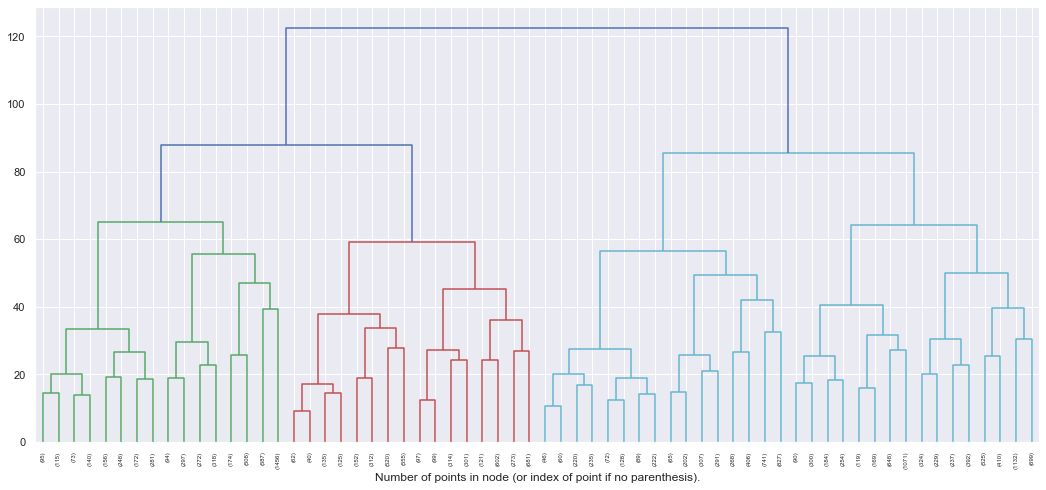

In [113]:
#Plot Dendogram
#plot the top five levels of the dendrogram
plt.figure(figsize=(18, 8));
plot_dendo(cluster, Bl.values, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

##### Feature Selection

In [11]:
X = feature_selector(Bl, my)

dropping 'Type' at index: 0
dropping 'Gender' at index: 0
dropping 'FurLength' at index: 0
Remaining variables:
Index(['agecat', 'breedcat', 'namecat', 'descriptcat', 'colorcat', 'colorcat2',
       'healthcat', 'statecat', 'MaturitySizecat', 'Photocat', 'quantitycat',
       'paidcat'],
      dtype='object')


In [12]:
#Train Cluster
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit(X)
#Get score
cm, metric = model_metrics(my, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.2270526610466766
Confusion Matrix: 
       0     1     2     3     4
0  1618  1518  1374  1125   868
1   650   587   747   923   724
2  1078   999  1018  1077  1504
3   385   623   613   610   225
4   462   344   265   304   696


##### Linkage Selection

In [13]:
#Find best linkage function
cluster, score, cm = ACparm(X, my, 5)
print('Linkage: ', cluster.linkage)
print('Affinity Metric: ', cluster.affinity)
print('Score: ', round(score, 2))
print('Confusion Matrix: \n', cm)

Linkage:  ward
Affinity Metric:  euclidean
Score:  0.23
Confusion Matrix: 
       0     1     2     3     4
0  1618  1518  1374  1125   868
1   650   587   747   923   724
2  1078   999  1018  1077  1504
3   385   623   613   610   225
4   462   344   265   304   696


#### 2.5.1.2 K_means

##### Basic Training

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(Bl)
#Get score
cm, metric = model_metrics(my, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.2270526610466766
Confusion Matrix: 
       0     1     2     3     4
0  1618  1518  1374  1125   868
1   650   587   747   923   724
2  1078   999  1018  1077  1504
3   385   623   613   610   225
4   462   344   265   304   696


##### Feature Selection

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
#Get score
cm, metric = model_metrics(my, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.2270526610466766
Confusion Matrix: 
       0     1     2     3     4
0  1618  1518  1374  1125   868
1   650   587   747   923   724
2  1078   999  1018  1077  1504
3   385   623   613   610   225
4   462   344   265   304   696


### 2.5.2 Binary Target

#### 2.5.2.1 Hierarchical Clustering

##### Basic Training

In [114]:
#Train Cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='ward')
cluster.fit(Bn)
#Get score
cm, metric = model_metrics(by, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.5248270376213008
Confusion Matrix: 
       0     1
0  3797  6126
1  6958  4629


##### Feature Selection

In [17]:
X = feature_selector(Bn, by)
#Train Cluster
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(X)
#Get score
cm, metric = model_metrics(by, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

dropping 'Type' at index: 0
dropping 'Gender' at index: 0
dropping 'FurLength' at index: 0
Remaining variables:
Index(['agecat', 'breedcat', 'namecat', 'descriptcat', 'colorcat', 'colorcat2',
       'healthcat', 'statecat', 'MaturitySizecat', 'Photocat', 'quantitycat',
       'paidcat'],
      dtype='object')
Score:  0.5185210072083354
Confusion Matrix: 
       0     1
0  5839  7180
1  4916  3575


##### Linkage Selection

In [18]:
#Find best linkage function
cluster, score, cm = ACparm(X, by, 2)
print('Linkage: ', cluster.linkage)
print('Affinity Metric: ', cluster.affinity)
print('Score: ', round(score, 2))
print('Confusion Matrix: \n', cm)

Linkage:  average
Affinity Metric:  l1
Score:  0.54
Confusion Matrix: 
       0     1
0  2999  5501
1  7756  5254


#### 2.5.2.2 K_means

##### Basic Training

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(Bn)
#Get score
cm, metric = model_metrics(by, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.5373139474868317
Confusion Matrix: 
       0     1
0  2999  5501
1  7756  5254


##### Feature Selection

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
#Get score
cm, metric = model_metrics(by, cluster)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.5373139474868317
Confusion Matrix: 
       0     1
0  2999  5501
1  7756  5254


### 2.5.3 Understanding the Clusters

It was clear in the previous part that our unsupervised algorithms are not finding our targets, but those this mean they are not working? And if not what are they finding?

To answer this questions we need a different approach, the first think we need is a new metric one that can evaluate the quality of our clusters without using knowledge of the ground truth (target), for this we will use the **Silhouette Coefficient**. It will use the distance between clusters to calculate cluster density and overlapping. This metric varies between [1,-1], where represents linear separable highly dense clusters, -1 incorrect clustering, and 0 overlapping clusters.

Since we are no longer working with targets we will use an imbalanced data set for this part, our main objective is to assert cluster quality and to understand the properties of the defined clusters.

#### 2.5.3.1 Cluster Quality

Lets start by searching for the best number of clusters, with a dendogram.

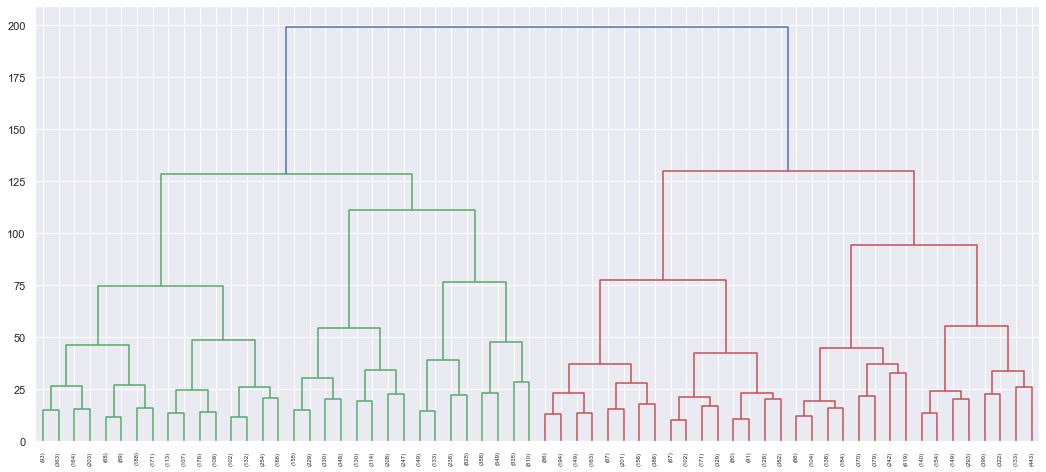

In [4]:
#Plot fisrt 5 levels of dendograme
plt.figure(figsize=(18, 8));
plt = plot_dendogram(Bin, p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

By looking at the dendogram it's clear that we have to main cluster, by cutting at the distance 120, we could obtain possibly 4 good cluster, but probably will get a better score with just 2.

In [8]:
#Train Cluster
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit(Bin)
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster4.fit(Bin)
c2 = round(metrics.silhouette_score(Bin, cluster2.labels_, metric='euclidean'),2)
c4 = round(metrics.silhouette_score(Bin, cluster4.labels_, metric='euclidean'),2)
print('Scores: \n')
print("2 Cluster's: ", c2)
print("4 Cluster's: ", c4)

Scores: 

2 Cluster's:  0.15
4 Cluster's:  0.12


So our theory checks out, we get a better score using 2 cluster's.
For the K_means algorithm we will probably use the same number of cluster, but let's make sure with a grid search.

In [18]:
best = 0
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(Bin)
    mt = metrics.silhouette_score(Bin, kmeans.labels_, metric='euclidean')
    if mt> best:
        best = mt
        n_clusters = n
print('Optimum number of clusters: ', n_clusters)
print('Best Score: ', round(best, 2))

Optimum number of clusters:  2
Best Score:  0.18


As we suspected the best score is obtained using 2 clusters, and the score his a little bit higher the one obtained by the hierarchical clustering algorithm.

But scores are far from  1 which means and closer to zero, this means our clusters might overlap at some point. Which will make them harder to identify, and makes them not has useful.

#### 2.5.3.2 Cluster Information and Importance

In this part we will use the dataset balanced to the binary target since we are gonna use our binary target.

In [58]:
# Train Clustering algorithms
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(Bn)
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ac.fit(Bn)
df = pd.DataFrame({'km': kmeans.labels_, 'ac': ac.labels_})
df.head()

,km,ac
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In this part we will use previous applied methodologies to identify information that this feature might contain to explain the binary target.

In [60]:
# cluster information
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(df, by)
#Create dict with colums and score
scores = {}
for i in range(len(df.columns)):
    scores.update({df.columns[i] : round(fit.scores_[i],2)} )
#Sort and print
print('Scores:')
scores2 = sorted(scores, key=scores.get, reverse=True)
for line in scores2:
        print (line,': ',scores[line])

Scores:
km :  639.08
ac :  468.13


We see that although this clustering algorithms are clearly not finding the targets the clusters they are creating have a lot of information about the target.

Now let's evaluate feature importance.

In [61]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(df, by, random_state=0)
#train random forest
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
#print results
print('Feature Importance:')
for f in range(len(clf.feature_importances_)):
    print(df.columns[f], ': ', round(clf.feature_importances_[f],2))
print('Score: ', round(clf.score(X_test,y_test),2))

Feature Importance:
km :  0.56
ac :  0.44
Score:  0.63


In [62]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      2669
           1       0.64      0.62      0.63      2709

    accuracy                           0.63      5378
   macro avg       0.63      0.63      0.63      5378
weighted avg       0.63      0.63      0.63      5378



In [29]:
scores

{'m': 385.03, 'c': 271.23}

Using only this clusters we are able to classify our target with 63% accuracy, is not great but it is a bit more them changes which means that our clusters have a information about the target.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([df, Bn], axis=1, sort=False), by, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Gender', 'agecat', 'colorcat', 'Photocat'], dtype='object')


We see that our clusters are not informative enough to retained for our best classifying model, which is normal since this model is very parcial to cardinality, and our clusters produce binary features. The features are also probably pretty correlate with the features retained.

#### 2.5.3.3 Cluster Rules

In [72]:
#Create binary database
bd = pd.concat([df, BT_db], axis=1, sort=False)
bd = bd.drop('Target', axis=1)
bd.head()

,km,ac,Gender1,Gender2,Gender3,Photocat0,Photocat1,Photocat2,Photocat3,Photocat4,...,FurLength,breedcat,namecat,descriptcat,colorcat2,healthcat,statecat,MaturitySizecat,quantitycat,paidcat
0,0,1,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1,1,0,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
2,1,0,True,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,False,False
3,1,0,False,True,False,False,False,False,False,False,...,True,False,True,False,True,True,False,True,False,True
4,1,0,True,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,True,False,False


In [87]:
#Compute Frequent items
frequent_itemsets = apriori(bd, min_support=0.3, use_colnames=True)
# Compute association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# get all rules for km and ac clusters with significant lifts
Brules = []
for i, rule in enumerate(rules.antecedents):
    if ('km' in str(rule) or 'ac' in str(rule)) and (rules.lift.values[i] < 0.99 
    or rules.lift.values[i] > 1.1) and len(rule) == 1 and len(rules.consequents.values[i]) == 1:
        Brules.append(i)
rules = rules.iloc[Brules]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ac),(colorcat2),0.53868,0.755974,0.382566,0.710192,0.939440,-0.024662,0.842028
12,(ac),(healthcat),0.53868,0.395630,0.300325,0.557521,1.409199,0.087208,1.365874


From this analysis we get very important rules, we now know that when the Hierarchical Clustering algorithm, classifies a pet in cluster 0 it's likely that it doesn't has black or brown color. From the understanding data task we know that this means he his more likely to be adopted.

When it classifies a pet in cluster 1 is likely that the `healthcat` feature his 1, since this feature his it self a cluster we cannot be for sure it's meaning, but when a pet has this value he is more likely to not be adopted (which probably means his less healthy from the thailandese people point of view).

So we can conclude that when a pet his classified in cluster 0 he his more likely to be adopted them when his classified in cluster one. This can easily be proven graphically. 

<Figure size 1296x576 with 0 Axes>

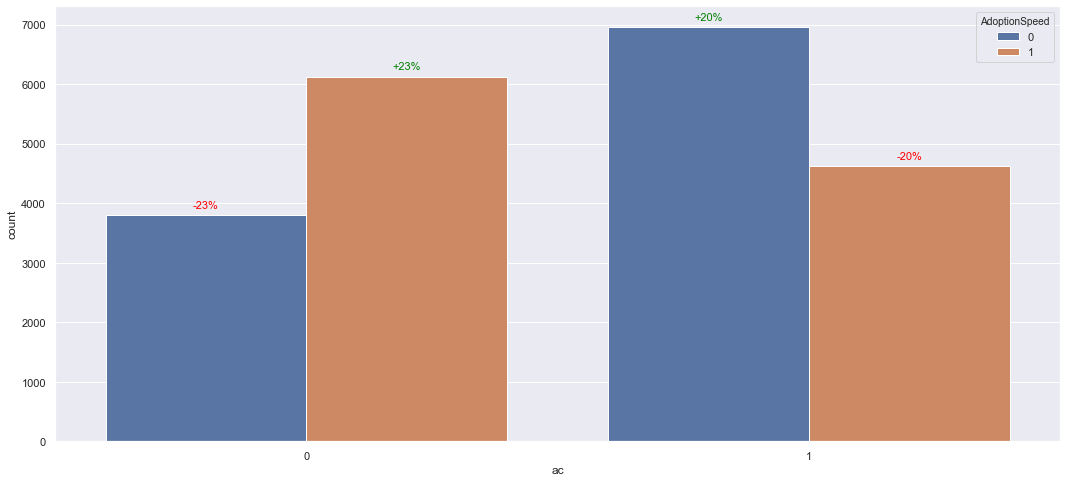

In [109]:
plt.figure(figsize=(18, 8));
df['AdoptionSpeed'] = by
make_count_plot(df=df, main_count = main_count, x='ac', title='ac')

Have in consideration that the graphic says adoption speed since it's based on a previously implemented function, but **blue stands for not adopted and orange for adopted**.

<Figure size 1296x576 with 0 Axes>

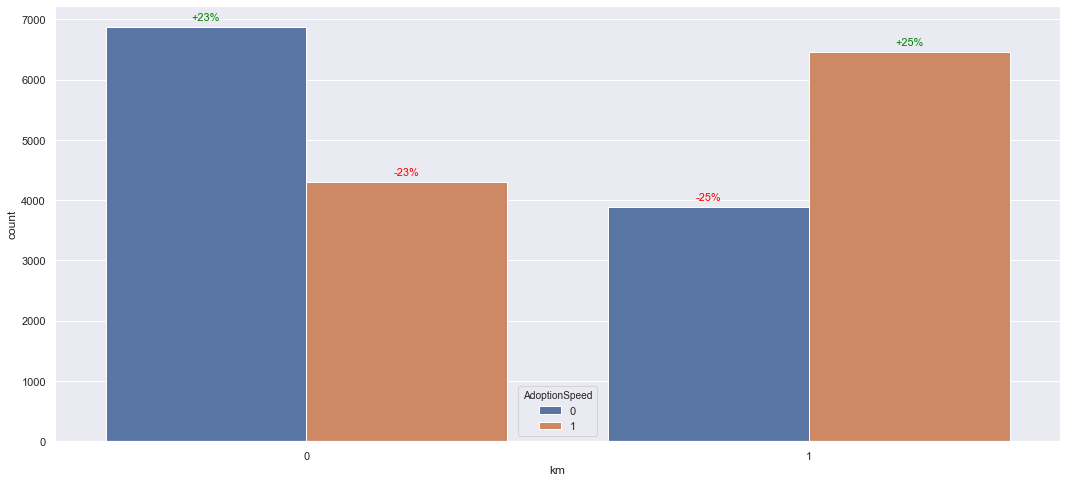

In [110]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, main_count = main_count, x='km', title='ac')

Has we can see above for the clusters produced by the `Kmeans` Algorithm, its the reverse, pets on cluster 0 are more likely to get adopted that pets on cluster 1.

## 2.6. Clustering - Results and Discussion 

...